# 生成 graphene nanotube 的 tight-binding model 

In [1]:
import pybinding as pb
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi

a_cc = 0.142  # [nm] carbon-carbon distance
t = -2.8      # [eV] nearest neighbour hopping
c0 = 0.335  # [nm] interlayer spacing


### 定義晶格結構 

In [33]:
def monolayer_graphene(a, t):

    lat = pb.Lattice(a1 = [3*a/2, sqrt(3)*a/2], a2 = [3*a/2, -sqrt(3)*a/2])
    lat.add_sublattices(('a', [0, 0]), ('b', [a/2, sqrt(3)*a/2]))

    lat.add_hoppings(([0,  0], 'a', 'b', t),
                     ([-1, 1], 'a', 'b', t),
                     ([-1, 0], 'a', 'b', t),
                     ([3, -1], 'a', 'b', t),
                     ([3, -2], 'a', 'b', t)
                    )                   

    return lat

### 定義有限區域 

In [34]:
def kite_shape(a1_coe, a2_coe):
    
    a1 = np.array([3*0.142/2, sqrt(3)*0.142/2])
    a2 = np.array([3*0.142/2, -sqrt(3)*0.142/2])
    coe = np.array([a1_coe/2, a2_coe/2])
    
    p1 = coe[0]*a1+coe[1]*a2
    p2 = coe[0]*a1-coe[1]*a2
    p3 = -coe[0]*a1-coe[1]*a2
    p4 = -coe[0]*a1+coe[1]*a2
    
    p = np.array([p1, p2, p3, p4])
    new_p = []

    
    for x in range(4):
        item = p[x]
        item = item.tolist()
        new_p.append(item)
        

    return pb.Polygon([new_p[0], new_p[1], new_p[2], new_p[3]])
 
    

### 畫出上述定義的晶格結構

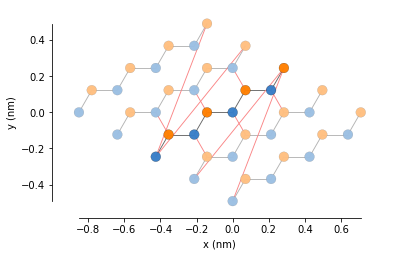

In [36]:
lat = monolayer_graphene(a_cc, t)
model = pb.Model(lat,
                 kite_shape(4, 4),
                 pb.translational_symmetry(a1 = False, a2 = True)
                )

model.plot()
#plt.savefig('123.png')

/home/xuangfu/.local/lib/python3.8/site-packages/pybinding/pltutils.py:79: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  ax.spines[side].set_smart_bounds(True)


array([-3.4086604, -2.8653922, -2.865389 , -2.1913385,  2.1913385,
        2.8653915,  2.8653917,  3.4086616], dtype=float32)

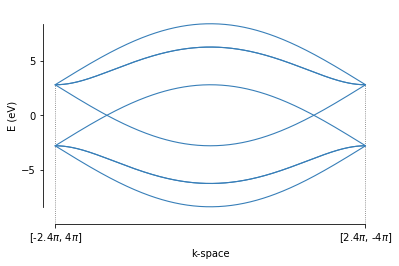

In [48]:
solver = pb.solver.lapack(model)

a = 0.245

bands = solver.calc_bands([-4.7*pi/2, 8.1*pi/2], [4.7*pi/2, -8.1*pi/2])
bands.plot()

bands.energy[10]

/home/xuangfu/.local/lib/python3.8/site-packages/pybinding/pltutils.py:79: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  ax.spines[side].set_smart_bounds(True)


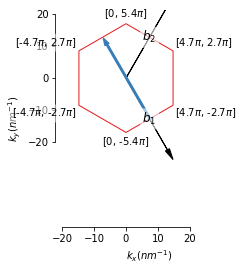

In [44]:
bands.plot_kpath()
lat.plot_brillouin_zone()